# Handle Missing Data

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("D:/Downloads/archive (22)/loan_data_set.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#total number of missing value in dataset
df.isnull().sum().sum()

149

In [6]:
df.dropna(axis=0).isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 

In [7]:
df.drop(['Dependents'],axis=1)
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#using fillna() and mean
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# replace missing value with median
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median()).isna().sum()

0

In [10]:
df['Married'].ffill().isna().sum()

0

In [11]:
df['Self_Employed'].bfill().isna().sum()

0

# Impute the Most Frequent Value

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(df)

array([['LP001002', 'Male', 'No', ..., 1.0, 'Urban', 'Y'],
       ['LP001003', 'Male', 'Yes', ..., 1.0, 'Rural', 'N'],
       ['LP001005', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ...,
       ['LP002983', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ['LP002984', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ['LP002990', 'Female', 'No', ..., 0.0, 'Semiurban', 'N']],
      dtype=object)

In [13]:
imputer = SimpleImputer(strategy='constant', fill_value='missing')
imputer.fit_transform(df)
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162           

# Interpolation

In [14]:
df.interpolate()
df.isna().sum()

C:\Users\heman\AppData\Local\Temp\ipykernel_16864\4235256301.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Multivariate Approach

In [15]:
import pandas as pd
d = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)
cols = ['SibSp', 'Fare', 'Age']
X = d[cols]
A=X
X

,SibSp,Fare,Age
0,1,7.2500,22.0
1,1,71.2833,38.0
2,0,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0
5,0,8.4583,NaN


In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
impute_it.fit_transform(X)

array([[ 1.        ,  7.25      , 22.        ],
       [ 1.        , 71.2833    , 38.        ],
       [ 0.        ,  7.925     , 26.        ],
       [ 1.        , 53.1       , 35.        ],
       [ 0.        ,  8.05      , 35.        ],
       [ 0.        ,  8.4583    , 28.50639495]])

# Nearest Neighbors Imputations (KNNImputer)

In [17]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
impute_knn.fit_transform(A)

array([[ 1.    ,  7.25  , 22.    ],
       [ 1.    , 71.2833, 38.    ],
       [ 0.    ,  7.925 , 26.    ],
       [ 1.    , 53.1   , 35.    ],
       [ 0.    ,  8.05  , 35.    ],
       [ 0.    ,  8.4583, 30.5   ]])

# Handling missing data

# Feature Scaling

# Normalization

#  

# Standardization

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [23]:
df['Loan_Status'] = pd.Categorical(df['Loan_Status'])
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

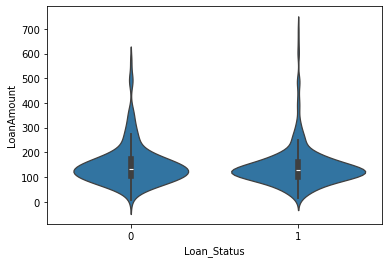

In [33]:
sns.violinplot(x="Loan_Status",y="LoanAmount",data=df)

In [34]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [35]:
scaler_minmax = MinMaxScaler()
df['LoanAmount_Normalized'] = scaler_minmax.fit_transform(df[['LoanAmount']])

# Standardize LoanAmount to mean=0 and std=1
scaler_standard = StandardScaler()
df['LoanAmount_Standardized'] = scaler_standard.fit_transform(df[['LoanAmount']])

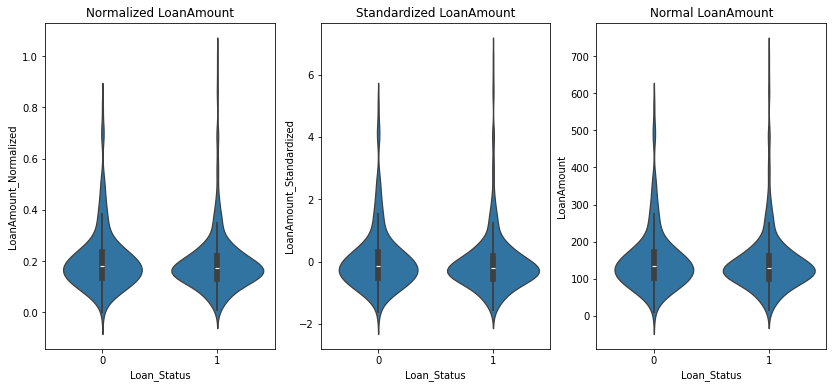

In [39]:
plt.figure(figsize=(14, 6))

# Plot normalized LoanAmount
plt.subplot(1, 3, 1)
sns.violinplot(x="Loan_Status", y="LoanAmount_Normalized", data=df)
plt.title('Normalized LoanAmount')

# Plot standardized LoanAmount
plt.subplot(1, 3, 2)
sns.violinplot(x="Loan_Status", y="LoanAmount_Standardized", data=df)
plt.title('Standardized LoanAmount')

plt.subplot(1, 3, 3)
sns.violinplot(x="Loan_Status",y="LoanAmount",data=df)
plt.title('Normal LoanAmount')

plt.show()